<a href="https://colab.research.google.com/github/Yunyaonate/coclear_segmentation/blob/main/Visualise_true_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
# import pydicom
import numpy as np

from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt


In [ ]:
filepath = "/content/drive/MyDrive/MDHDS/Capstone/Test_data"


# Load single image
- Now we have convert the DICOM into JPEG file, and have done the label annotationk, we want to test with loading the single image the the true mask


In [ ]:
img_path = "/content/drive/MyDrive/MDHDS/Capstone/Test_data/208_I0000616.jpeg"

img_bgr = cv2.imread(img_path)

img_bgr.shape


(296, 724, 3)

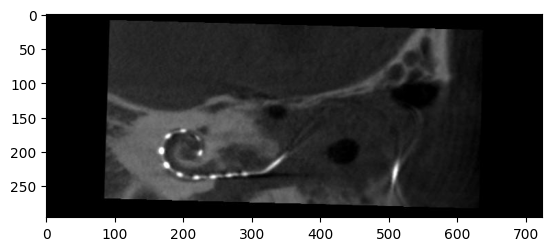

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## Creat a plain image

In [ ]:
# !pip install numpy
# import numpy as np

img_mask = np.zeros(img_bgr.shape[0:2])
img_mask


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

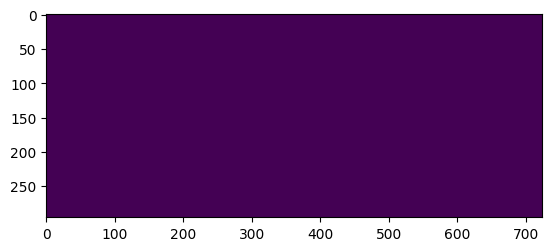

In [ ]:
plt.imshow(img_mask)
plt.show()

# Load the annotation file (in json)

In [ ]:
labelme_json_path = "/content/drive/MyDrive/MDHDS/Capstone/Test_data/208_I0000616.json"

with open(labelme_json_path,'r',encoding='utf-8') as f:
  labelme = json.load(f)

labelme.keys()

for each in labelme['shapes']:
  print(each['label'], each['shape_type'])

electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
electrode polygon
cochlear rectangle


In [ ]:
class_info = [
    {'label':'electrode','type':'circle','color':1},
    {'label':'electrode','type':'polygon','color':1},
    {'label':'cochlear','type':'rectangle','color':2}
]

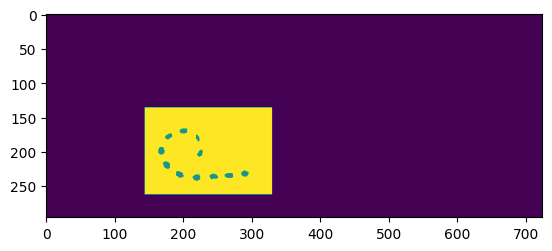

In [ ]:
# import numpy as np
# import cv2
# import json

# Initialize the mask with the same dimensions as the input image, but single channel for mask
img_mask = np.zeros(img_bgr.shape[:2], dtype=np.uint8)

labelme_json_path = "/content/drive/MyDrive/MDHDS/Capstone/Test_data/img_dir/208_I0000616.json"

with open(labelme_json_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

class_info = [
    {'label': 'electrode', 'type': 'circle', 'color': 1, 'thickness': -1},  # Use thickness=-1 for filled circles
    {'label': 'cochlear', 'type': 'rectangle', 'color': 2, 'thickness': -1},  # Assuming rectangles are filled
    # Add a generic polygon class if needed
    {'label': 'electrode', 'type': 'polygon', 'color': 1, 'thickness': -1}  # Assuming polygons are filled
]
# Draw rectangles first
for each in labelme['shapes']:
    if each['shape_type'] == 'rectangle':
        for one_class in class_info:
            if each['label'] == one_class['label'] and one_class['type'] == 'rectangle':
                points = np.array(each['points'], dtype=np.int32)
                top_left = tuple(points[0])
                bottom_right = tuple(points[1])
                cv2.rectangle(img_mask, top_left, bottom_right, one_class['color'], one_class['thickness'])

# Then draw polygons (if needed)
for each in labelme['shapes']:
    if each['shape_type'] == 'polygon':
        for one_class in class_info:
            if each['label'] == one_class['label'] and one_class['type'] == 'polygon':
                points = np.array(each['points'], dtype=np.int32)
                cv2.fillPoly(img_mask, [points], one_class['color'])

# Finally, draw circles
for each in labelme['shapes']:
    if each['shape_type'] == 'circle':
        for one_class in class_info:
            if each['label'] == one_class['label'] and one_class['type'] == 'circle':
                points = np.array(each['points'], dtype=np.int32)
                center = tuple(points[0])
                edge = tuple(points[1])
                radius = int(np.linalg.norm(points[0] - points[1]))
                cv2.circle(img_mask, center, radius, one_class['color'], one_class['thickness'])

# If you want to visualize the mask
plt.imshow(img_mask)
plt.show()


# Save the mask in PNG file

In [ ]:
print(img_mask.shape)

mask_path = img_path.split('.')[0]+'.png'
print("Mask path:", mask_path)

# write the mask image
cv2.imwrite(mask_path,img_mask)

(296, 724)
Mask path: /content/drive/MyDrive/MDHDS/Capstone/Test_data/208_I0000616.png


True

# Load the mask image

(296, 724, 3)


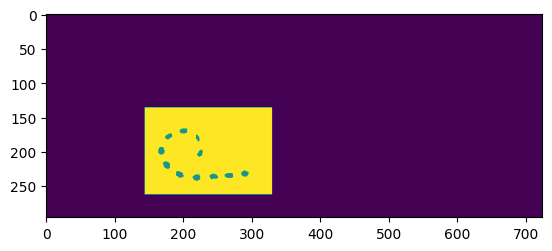

In [ ]:
mask_img = cv2.imread(mask_path)
print(mask_img.shape)
np.unique(mask_img)

plt.imshow(mask_img[:,:,0])
plt.show()

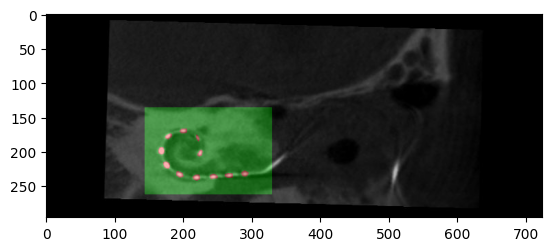

In [ ]:
# First create a color mask
color_mask = np.zeros_like(img_bgr)  # Initialize a color mask with the same dimensions as the original image

# Assign colors to each class in the mask
# For example, let's say 1 represents 'electrode' and 2 represents 'cochlear'
# We'll color 'electrode' areas with red and 'cochlear' areas with green
color_mask[img_mask == 1] = [255, 0, 0]  # Red for 'electrode'
color_mask[img_mask == 2] = [0, 255, 0]  # Green for 'cochlear'

# Now, overlay the color mask on the original image
# Adjust the alpha value to control the transparency of the overlay
alpha = 0.3  # Transparency factor.
# The closer alpha is to 1, the more opaque the overlay will be
# The closer alpha is to 0, the more transparent the overlay will be

# Blend the original image and the color mask
overlayed_image = cv2.addWeighted(img_bgr, 1-alpha, color_mask, alpha, 0)

# Display the result
plt.imshow(overlayed_image)

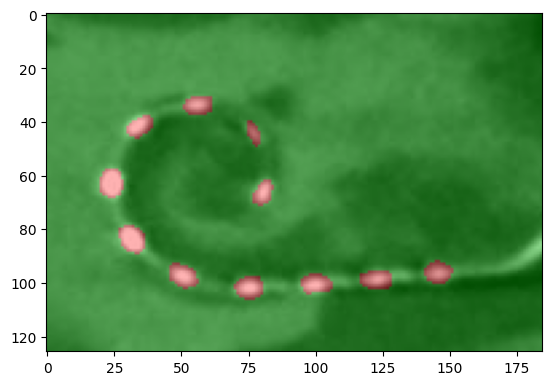

In [ ]:
x1,y1 = top_left
x2,y2 = bottom_right

# Crop the image
cropped_image = overlayed_image[y1:y2,x1:x2]
plt.imshow(cropped_image)

In [ ]:
from ipywidgets import interact

# Directory where the PNG images are located
ann_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/ann_dir'

# Get a list of PNG files in the directory
png_files = [f for f in os.listdir(ann_dir) if f.endswith('.png')]

# Function to read and display an image
def display_image(file_idx):
    # Read image
    img_path = os.path.join(ann_dir, png_files[file_idx])
    img = cv2.imread(img_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert color from BGR to RGB
    # Display image shape and unique values in the image
    print(f"Image shape: {img.shape}")
    print(f"Unique values in the image: {np.unique(img[:,:,0])}")

    # Display the image
    plt.imshow(img[:,:,0])
    plt.axis('off') # Hide the axis
    plt.show()

# Create a slider to select different images
interact(display_image, file_idx=(0, len(png_files)-1))

interactive(children=(IntSlider(value=18, description='file_idx', max=37), Output()), _dom_classes=('widget-in…

<function __main__.display_image(file_idx)>

In [ ]:
import numpy as np
import cv2
from ipywidgets import interactive
import matplotlib.pyplot as plt


# Directory where the PNG images are located
ann_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/ann_dir'
img_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/img_dir/'

# Get a list of PNG files in the directory
png_files = [f for f in os.listdir(ann_dir) if f.endswith('.png')]
scan_files = [f for f in os.listdir(img_dir) if f.endswith('.jpeg')]

# Function to read and display an image
def display_image(file_idx):
    # Read image
    ann_path = os.path.join(ann_dir, png_files[file_idx])
    img_path = os.path.join(img_dir, scan_files[file_idx])

    img_scan = cv2.imread(img_path)
    img_mask = cv2.imread(ann_path, 0)  # Read as grayscale

    # Check if images are read properly
    if img_scan is None or img_mask is None:
        print("Error reading the images.")
        return

    # Check the unique values in img_mask
    print(f"Unique values in the mask: {np.unique(img_mask)}")

    # Assuming the mask has values 1 and 2, check the shape and data type
    print(f"Mask shape: {img_mask.shape}, Image shape: {img_scan.shape}, Mask data type: {img_mask.dtype}")

    # Create a color mask with the same dimensions as the original image
    color_mask = np.zeros_like(img_scan)
    color_mask[img_mask == 1] = [0, 0, 255]  # Red for 'electrode'
    color_mask[img_mask == 2] = [0, 255, 0]  # Green for 'cochlear'

    # Now, overlay the color mask on the original image
    alpha = 0.3

    # Blend the original image and the color mask
    overlayed_image = cv2.addWeighted(img_scan, 1-alpha, color_mask, alpha, 0)

    # Convert to RGB for display
    overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.imshow(overlayed_image)
    plt.axis('off')  # Hide the axis
    plt.show()

# Create a slider to select different images
interact(display_image, file_idx=(0, len(png_files)-1))